# Procesamiento de imágenes #07
### Segmentación de la imagen

Dra. C. Miriela Escobedo Nicot

### Resumen

* Segmentación.
* Métodos basados en un criterio de discontinuidad.
    * Operador gradiente.
    * Derivadas de segundo orden.
* Métodos basados en el criterio de homogeneidad.
    * Umbralización.
* Métodos de segentación que son basados en la evolución de contornos.
    * Contornos activos paramétricos.
    * Contornos activos geométricos.
    
### Segmentación

* Proceso que subdivide una imagen en sus partes constituyentes u objetos.

![](images/35.png)

### Métodos basados en un criterio de discontinuidad
* Enfatizan las discontinuidades de una imagen con el objetivo de crear particiones de la misma basada en los cambios abruptos de intensidades.

* Técnicas locales, sensibles al ruido.

* La detección de bordes.

* Cálculo de la primera y segunda derivada:
    * Magnitud de la primera derivada para detectar la presencia de un borde.
    * Signo de la segunda derivada se usa para determinar si un píxel borde descansa en el fondo o en un borde.

### Operador gradiente

![](images/36.png)

In [1]:
from pylab import *

rcParams['image.cmap'] = 'gray'

In [2]:
A = imread("dataset/lena_gray_256.tif").astype('float')

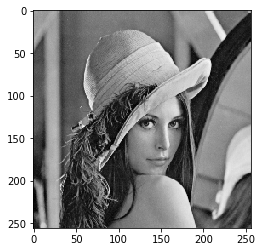

In [3]:
imshow(A)

Gradiente horizontal

In [4]:
def gradient_x(image):
    R = zeros_like(image)
    
    for x in range(0, image.shape[0]):
        for y in range(0, image.shape[1]):
            R[x,y] = image[x,y] - image[x, y-1]
        
    return R

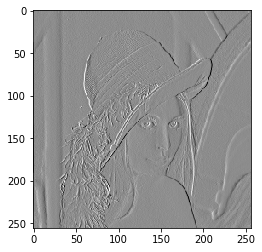

In [5]:
B = gradient_x(A)
imshow(B)

Gradiente vertical

In [6]:
def gradient_y(image):
    R = zeros_like(image)
    
    for x in range(0, image.shape[0]):
        for y in range(0, image.shape[1]):
            try:
                R[x,y] = image[x,y] - image[x+1, y]
            except:
                R[x,y] = image[x,y] - image[x, y]
    return R

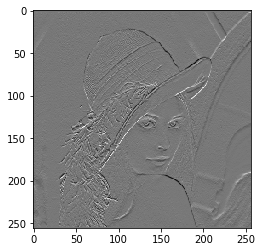

In [7]:
C = gradient_y(A)
imshow(C)

### Métodos basados en el gradiente primer orden

![](images/37.png)

In [8]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

#### Prewitt

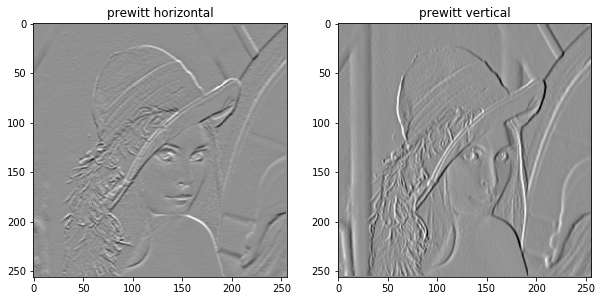

In [9]:
from skimage.filters import prewitt_h, prewitt_v

PH = prewitt_h(A); PV = prewitt_v(A)

imshow_all(PH, PV, titles=["prewitt horizontal", "prewitt vertical"])

### Sobel

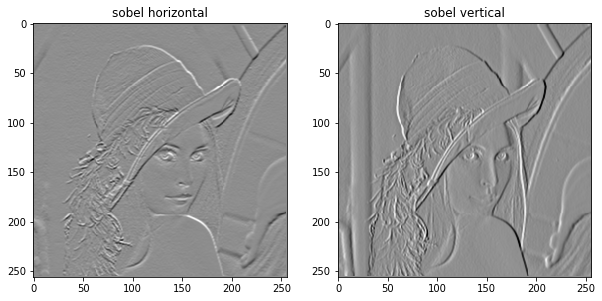

In [10]:
from skimage.filters import sobel_h, sobel_v

SH = sobel_h(A); SV = sobel_v(A)

imshow_all(SH, SV, titles=["sobel horizontal", "sobel vertical"])

Muchas de estas operaciones ya vienen programadas en `skimage`, pero recordemos que aplicar un filtro no es más que aplicar una operación de correlación o convolución entre la imagen y la matriz correspondiente al filtro.

### Roberts

In [11]:
from scipy.ndimage import correlate

In [12]:
roberts_y = array([
    [-1, 0],
    [0, 1]
])

In [13]:
roberts_x = array([
    [0, -1],
    [1, 0]
])

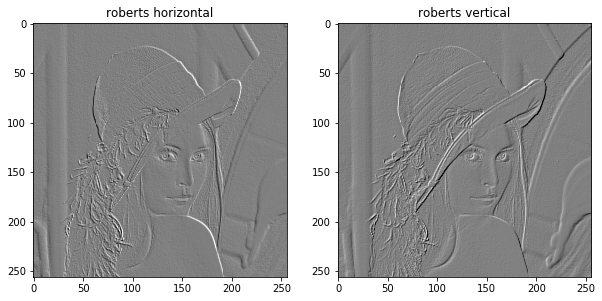

In [14]:
RH = correlate(A, roberts_x)
RV = correlate(A, roberts_y)

imshow_all(RH, RV, titles=["roberts horizontal", "roberts vertical"])

### Frei-Chen

In [15]:
fchen_y = array([
    [1, 0, -1],
    [sqrt(2), 0, -sqrt(2)],
    [1, 0, -1]
])*(1/(2+sqrt(2)))

In [16]:
fchen_x = array([
    [-1, -sqrt(2), -1],
    [0, 0, 0],
    [1, sqrt(2), 1]
])*(1/(2+sqrt(2)))

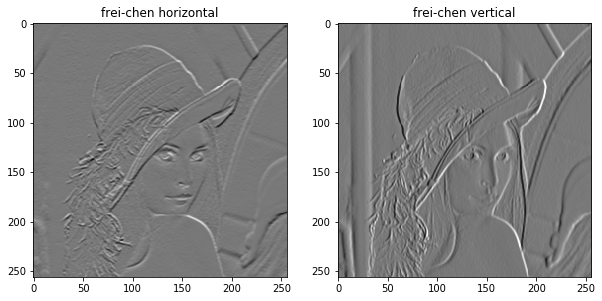

In [17]:
FH = correlate(A, fchen_x)
FV = correlate(A, fchen_y)

imshow_all(FH, FV, titles=["frei-chen horizontal", "frei-chen vertical"])

### Métodos de segundo orden: Laplaciano

In [18]:
from skimage.filters import laplace

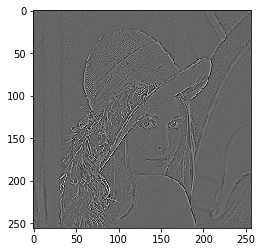

In [19]:
imshow(laplace(A))

### Métodos de segundo orden: Laplaciano del Gausiano

* Primero suaviza la imagen con un kernel Gaussiano y luego aplica el Laplaciano.
* La respuesta del filtro es cero en las zonas de intensidad constante, y será diferente de cero en las zonas de trasnsición.
* En el borde el operador retorna una respuesta positiva en el lado oscuro y una respuesta negativa en el lado más claro.

In [20]:
from skimage.filters import gaussian

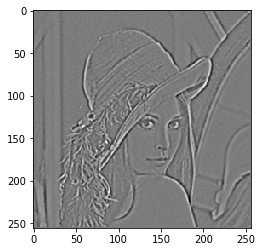

In [35]:
imshow(laplace(gaussian(A)))

### Método de Canny

* Se suaviza la imagen usando un kernel Gaussiano.
* Obtención del gradiente.
* Adelgazamiento del ancho de los bordes obtenidos con el gradiente, hasta lograr bordes de un pixel de ancho.
* Histéresis de umbral al resultado.

In [22]:
from skimage.filters import threshold_otsu as otsu

In [23]:
CA = laplace(gaussian(A))

In [24]:
CB = CA < otsu(CA)

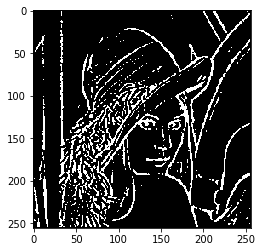

In [25]:
imshow(CB)

![](images/38.png)



![](images/39.png)